In [1]:
# Importing the necessary librararies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# Import the dataset

In [4]:
data = pd.read_csv("D:\Data science\Assignments docs\Decision tree\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.shape

(600, 6)

In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
# Unique values in each column

In [8]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [9]:
# Converting the continuous values of "Taxable.Income" into categorial values of "Risky" and "Good"

In [10]:
frd = pd.cut(data["Taxable.Income"], bins=[0,30000,100000],labels =["Risky","Good"])

In [11]:
# Combining the converted values into the original dataset and removing earlier column

In [12]:
data.insert(1,'Tax_income',frd)
data= data.iloc[:,[0,1,2,4,5,6]]
data.head()

,Undergrad,Tax_income,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Good,Single,50047,10,YES
1,YES,Good,Divorced,134075,18,YES
2,NO,Good,Married,160205,30,YES
3,YES,Good,Single,193264,15,YES
4,NO,Good,Married,27533,28,NO


## Data exploration

In [13]:
import seaborn as sns

In [14]:
# Value counts

In [15]:
data.Tax_income.value_counts()

Good     476
Risky    124
Name: Tax_income, dtype: int64

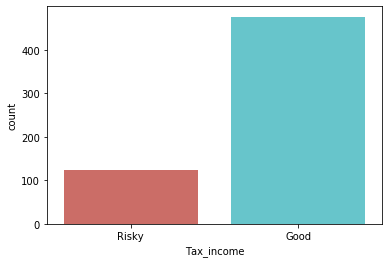

In [16]:
sns.countplot(data["Tax_income"], palette="hls")

In [17]:
# Counts for "Good" taxable income is very high compared to "Risky" counts

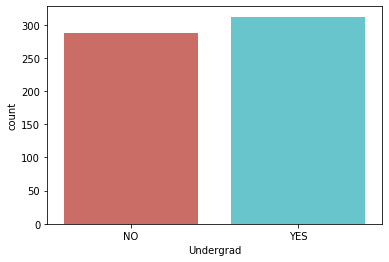

In [18]:
sns.countplot(data["Undergrad"], palette="hls")

In [19]:
# Counts for customers with Undergraduation are relatively high compared to the customers without undergraduation 

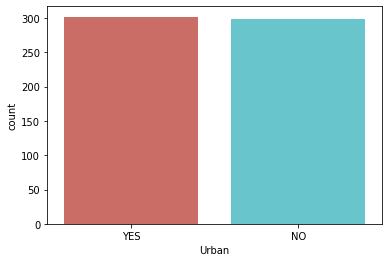

In [20]:
sns.countplot(data["Urban"], palette="hls")

In [21]:
# Population from urban and non_urban is almost same

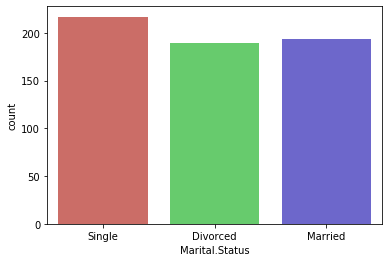

In [22]:
sns.countplot(data["Marital.Status"], palette="hls")

In [23]:
# Marital status of most of the customers are single and others being Married or Divorced

{'whiskers': [<matplotlib.lines.Line2D at 0x1f17b228888>,
 'caps': [<matplotlib.lines.Line2D at 0x1f17b228fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f17b223e08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f17b22df48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f17b231f48>],
 'means': []}

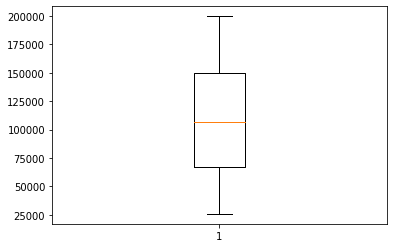

In [24]:
plt.boxplot(data["City.Population"])

In [25]:
# The city population has a range of 25000 to 200000 with mean popluation being near 110000

{'whiskers': [<matplotlib.lines.Line2D at 0x1f17b296d48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f17b299d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f17b2962c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f17b29fc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f17b29fd88>],
 'means': []}

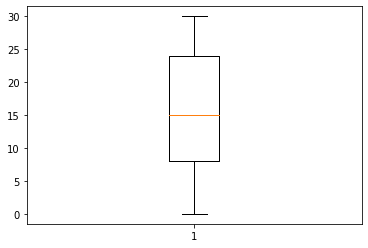

In [26]:
plt.boxplot(data["Work.Experience"])

In [27]:
# Work experience of the customers vary from 0 years to 30 years, with mean experience being 15 years

In [28]:
# Obtaining the dummy variables for 'Undergrad','Marital.Status','Urban'

In [29]:
data = pd.get_dummies(data, columns =['Undergrad','Marital.Status','Urban'],drop_first=True)
data.head()

,Tax_income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0


In [30]:
# Checking for any NA values

In [31]:
data.isna().sum()

Tax_income                0
City.Population           0
Work.Experience           0
Undergrad_YES             0
Marital.Status_Married    0
Marital.Status_Single     0
Urban_YES                 0
dtype: int64

In [32]:
# No NA values in the dataset

In [33]:
data.shape

(600, 7)

In [34]:
# Divivng the data into X and Y i.e. predictors and target

In [35]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [36]:
# Splitting the data into training and testing dataset

In [37]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2)

## Decision tree classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Building the Random forest model 

In [40]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [41]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
# Predicting the target values using the model

In [43]:
y_pred = clf.predict(x_test)
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',

In [44]:
# Value counts of predicted values

In [45]:
pd.Series(y_pred).value_counts()

Good     113
Risky      7
dtype: int64

In [46]:
# Buliding confusion matrix

In [47]:
confusion_matrix(y_pred, y_test)

array([[91, 22],
       [ 7,  0]], dtype=int64)

In [48]:
# Accuracy of the model

In [49]:
Accuracy_entropy = accuracy_score(y_pred,y_test)
Accuracy_entropy

0.7583333333333333

In [50]:
# Using the Random Forest model again but using the "entropy" as criterion

In [51]:
model1 = RandomForestClassifier(criterion="entropy", n_estimators=100, random_state=0)

In [52]:
model1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [53]:
# Predicting the target values using the model

In [54]:
y_pred1 = model1.predict(x_test)
y_pred1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Goo

In [55]:
# Value counts of predicted values

In [56]:
pd.Series(y_pred1).value_counts()

Good     110
Risky     10
dtype: int64

In [57]:
# Buliding the confusion matrix

In [58]:
confusion_matrix(y_pred1, y_test)

array([[88, 22],
       [10,  0]], dtype=int64)

In [59]:
# Accuracy of the model

In [60]:
Accuracy_entropy = accuracy_score(y_pred1,y_test)
Accuracy_entropy

0.7333333333333333

In [61]:
# Accuracy with "entropy" as criterion is almost same as the one with "gini"

In [62]:
# Checking the accuracy of the model with different no. of trees 

In [63]:
model2 = RandomForestClassifier(n_estimators=200,random_state=0)

In [64]:
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [65]:
# Predicting the target value using the model

In [66]:
y_pred2= model2.predict(x_test)
y_pred2

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',

In [67]:
# Confusion matrix

In [68]:
confusion_matrix(y_pred2,y_test)

array([[91, 22],
       [ 7,  0]], dtype=int64)

In [69]:
# Accuracy 

In [70]:
Accuracy3 = accuracy_score(y_pred2,y_test)
Accuracy3

0.7583333333333333

In [71]:
# Highest accuracy of 75.8 % is achieved with n_estimators value of 200

In [72]:
# Getting the feature important variables in the dataset

In [73]:
feature_imp = pd.Series(model2.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

City.Population           0.529344
Work.Experience           0.351824
Urban_YES                 0.035499
Undergrad_YES             0.033167
Marital.Status_Married    0.026634
Marital.Status_Single     0.023531
dtype: float64

In [74]:
import seaborn as sns

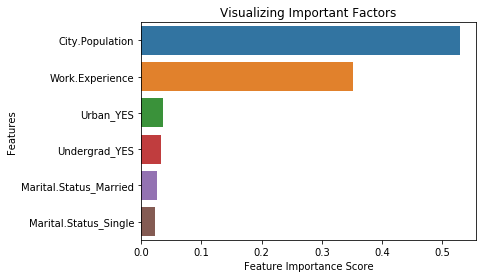

In [75]:
sns.barplot(feature_imp, feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Factors")
plt.show()

In [76]:
# Variable "City.Population" is the most important feature in the dataset and 'Marital.Status' is the least important one hence elimintaing thar variable

## Random Forest model with important features

In [77]:
data.head()

,Tax_income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0


In [78]:
# Redefining the predictors and target variables

In [79]:
X1 = data.iloc[:,[1,2,3,6]]
Y1 = data.iloc[:,0]

In [80]:
# Spliting the data into training and testing

In [81]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,Y1, test_size = 0.2)

In [82]:
# Buliding Random Forest classifier

In [83]:
new_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [84]:
new_model.fit(x1_train, y1_train)

RandomForestClassifier(random_state=0)

In [85]:
# Predicting the target values using the model

In [86]:
y_pred3 = new_model.predict(x1_test)
y_pred3

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',

In [87]:
# Confusion matrix

In [88]:
confusion_matrix(y_pred3,y1_test)

array([[90, 22],
       [ 8,  0]], dtype=int64)

In [89]:
# Accuracy 

In [90]:
Accuracy_new = accuracy_score(y_pred3,y1_test)
Accuracy_new

0.75

In [91]:
# There is not much change in the accuracy of model even after removing the less feature important variable like 'Marital.Status'

## Observations

In [92]:
# The Random Forest model with "gini" criterion and with n_estimators of 200 has given the highest accuracy of 75.86 % 
# Removing less important feature variable like "Marital.Status" hasn't increased the accuracy of the model, hence the removed variable can be considered